In [14]:
##Estimación de indicadores de seguridad
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign,zoo)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Using GitHub PAT from the git credential store.




rlang (1.1.4 -> 1.1.6) [CRAN]
glue  (1.7.0 -> 1.8.0) [CRAN]
cli   (3.6.3 -> 3.6.5) [CRAN]


Installing 3 packages: rlang, glue, cli

Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpIbnzeR\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpIbnzeR\remotes876c39397200\cpyp-ipdp-funcionespgd-8b2a39e/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Warning message:
"package 'funcionespgd' is in use and will not be installed"


In [16]:
## leer excel
informalidad <- openxlsx::read.xlsx("trabajo/datos_indicadorestrabajo_20250530.xlsx", sheet="informalidad")%>%
  
rename(
  year = periodo,
  estimado = tendencia_deseable,
  superior = tendencia_inercial,
  inferior=tendencia_disruptivo

)%>%
mutate(
    year = as.yearqtr(gsub("-", " Q", year), format = "%Y Q%q")
  )
informalidad

,year,superior,estimado,inferior
,<yearqtr>,<dbl>,<dbl>,<dbl>
1,2005 Q1,49.4,49.4,49.4
2,2005 Q2,49.7,49.7,49.7
3,2005 Q3,50.4,50.4,50.4
4,2005 Q4,51.6,51.6,51.6
5,2006 Q1,50.5,50.5,50.5
6,2006 Q2,51.4,51.4,51.4
7,2006 Q3,49.3,49.3,49.3
8,2006 Q4,47.2,47.2,47.2
9,2007 Q1,47.9,47.9,47.9


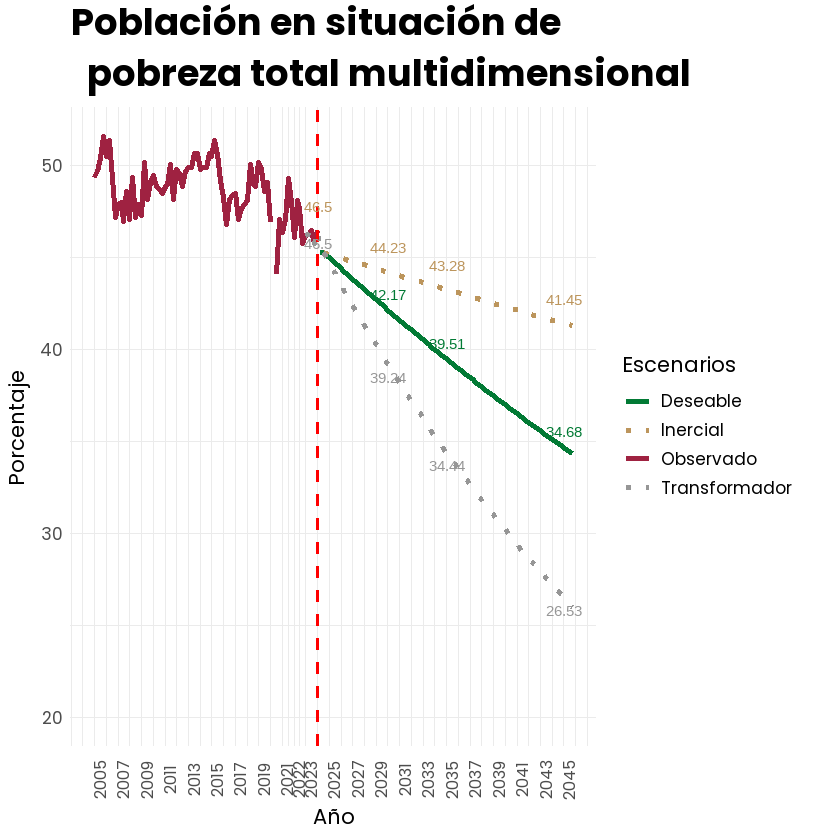

In [ ]:
grafica_bonita(
  data = informalidad,
  x = "year",
  y = "estimado",
  titulo = "Tasa de informalidad laboral",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 20
)

ggsave("trabajo/informalidad_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

In [26]:
tcco <- openxlsx::read.xlsx("trabajo/datos_indicadorestrabajo_20250530.xlsx", sheet="tcco")%>%
  
rename(
  year = periodo,
  estimado = tendencia_deseable,
  superior = tendencia_inercial,
  inferior=tendencia_disruptivo

)%>%
mutate(
    year = as.yearqtr(gsub("-", " Q", year), format = "%Y Q%q")
  )
tcco

,year,superior,estimado,inferior
,<yearqtr>,<dbl>,<dbl>,<dbl>
1,2005 Q1,9.9,9.9,9.9
2,2005 Q2,9.6,9.6,9.6
3,2005 Q3,9.6,9.6,9.6
4,2005 Q4,9.0,9.0,9.0
5,2006 Q1,8.2,8.2,8.2
6,2006 Q2,7.1,7.1,7.1
7,2006 Q3,7.4,7.4,7.4
8,2006 Q4,7.3,7.3,7.3
9,2007 Q1,7.9,7.9,7.9


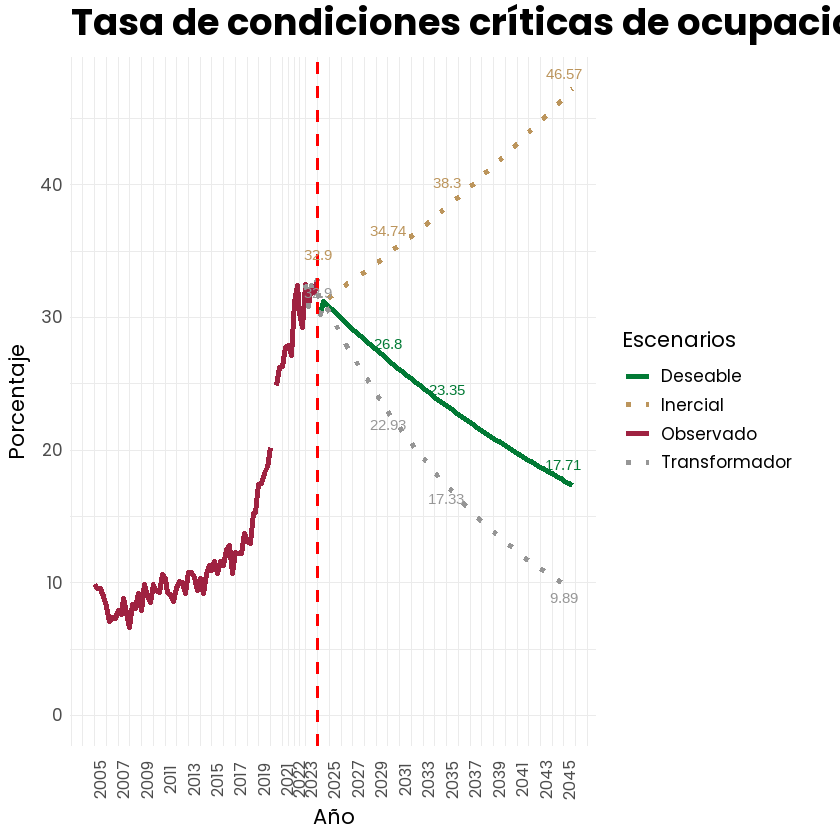

In [29]:
grafica_bonita(
  data = tcco,
  x = "year",
  y = "estimado",
  titulo = "Tasa de condiciones críticas de ocupación",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("trabajo/tcco_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

In [30]:
partfem <- openxlsx::read.xlsx("trabajo/datos_indicadorestrabajo_20250530.xlsx", sheet="tasa_part_fem")%>%
  
rename(
  year = periodo,
  estimado = tendencia_deseable,
  superior = tendencia_inercial,
  inferior=tendencia_disruptivo

)%>%
mutate(
    year = as.yearqtr(gsub("-", " Q", year), format = "%Y Q%q")
  )
partfem

,year,superior,estimado,inferior
,<yearqtr>,<dbl>,<dbl>,<dbl>
1,2005 Q1,44.9,44.9,44.9
2,2005 Q2,46.1,46.1,46.1
3,2005 Q3,46.4,46.4,46.4
4,2005 Q4,48.0,48.0,48.0
5,2006 Q1,48.0,48.0,48.0
6,2006 Q2,47.9,47.9,47.9
7,2006 Q3,49.8,49.8,49.8
8,2006 Q4,50.0,50.0,50.0
9,2007 Q1,49.6,49.6,49.6


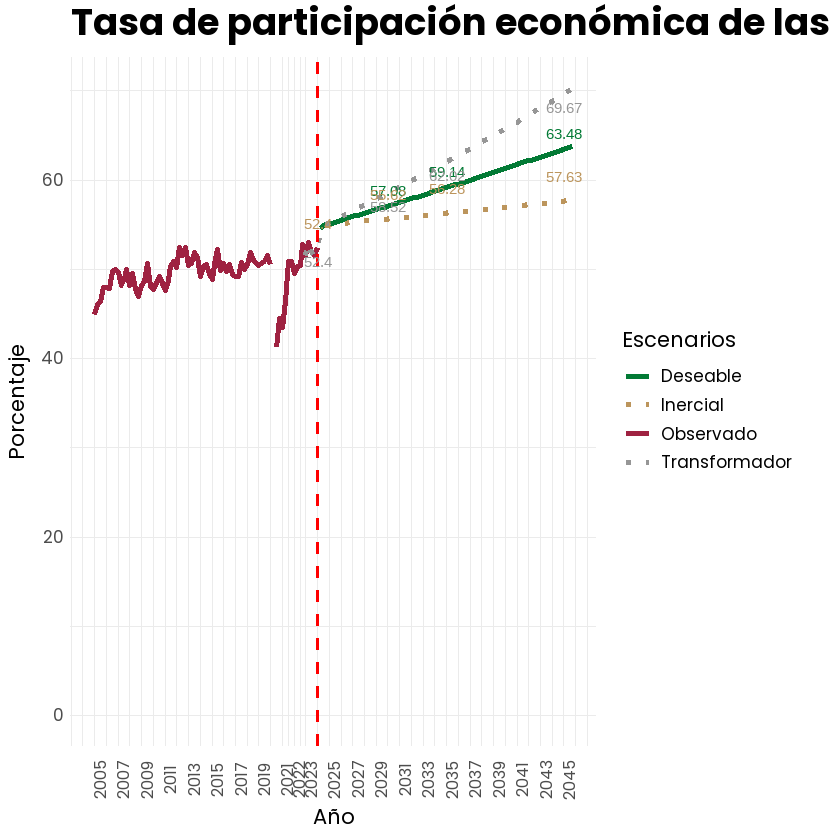

In [31]:
grafica_bonita(
  data = partfem,
  x = "year",
  y = "estimado",
  titulo = "Tasa de participación económica de las mujeres",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("trabajo/tpartfem_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

In [33]:
prod <- openxlsx::read.xlsx("trabajo/datos_indicadorestrabajo_20250530.xlsx", sheet="productividad")%>%
  
rename(
  year = periodo,
  estimado = tendencia_deseable,
  superior = tendencia_inercial,
  inferior=tendencia_disruptivo

)
prod

,year,superior,estimado,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2005,90.76008,90.76008,90.76008
2,2006,92.81775,92.81775,92.81775
3,2007,95.22517,95.22517,95.22517
4,2008,96.45228,96.45228,96.45228
5,2009,91.84219,91.84219,91.84219
6,2010,95.28200,95.28200,95.28200
7,2011,96.74175,96.74175,96.74175
8,2012,96.21962,96.21962,96.21962
9,2013,96.79505,96.79505,96.79505


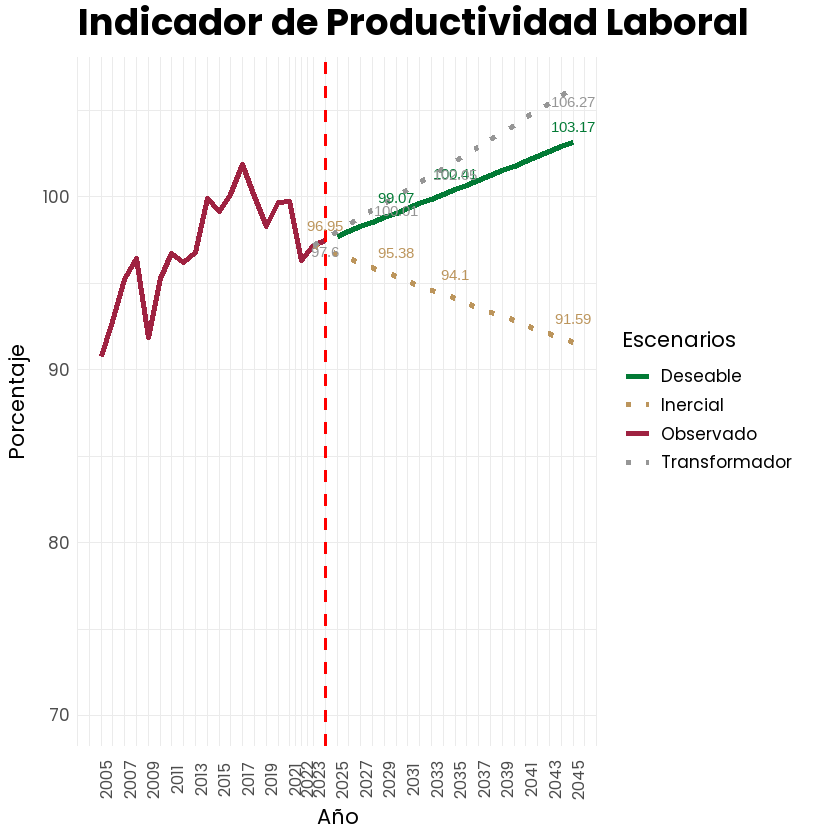

In [35]:
grafica_bonita(
  data = prod,
  x = "year",
  y = "estimado",
  titulo = "Indicador de Productividad Laboral",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 70
)

ggsave("trabajo/prod_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")